In [2]:
import os
import sys
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import set_option
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns
%matplotlib inline 


**Importing Libraries**

In [3]:
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# import performance metrics/measures
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# from imblearn.under_sampling import KMeansSMOTE
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

**Load Daataset**


In [4]:
INPUT_PATH = pd.read_csv('/content/default of credit card clients.csv')




In [5]:
# SCALER = 'std'  # else 'minmax'

SHOW_FIGURE = True


RANDOM_STATE = 42   # fixed in order to have comparable results

# Pandas options
set_option('display.max_colwidth', None)
set_option('precision', 2)


In [6]:
# preprocessing
FEATURE_SELECTION = False  # if 'True' Feature Selection will be applied (i.e. 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6' will be removed)
APPLY_PCA = False                # if 'True' Principal Component Analysis will be applied
APPLY_OVERSAMPLING = False       # if 'True' SMOTE Oversampling will be applied

In [7]:
data = pd.read_csv(INPUT_PATH)
data.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


**Is data balanced**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


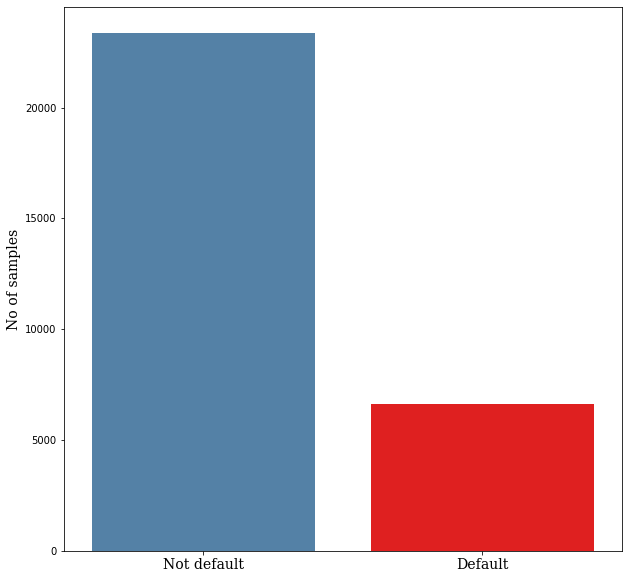

In [8]:
if SHOW_FIGURE :
    font = FontProperties()
    font.set_family(['Times New Roman', 'serif'])
    font.set_size(14)

    plt.figure(figsize = (10,10))
    sns.countplot('default.payment.next.month', data=data, palette=['steelblue','red'])
    plt.xticks([0,1],['Not default','Default'],fontproperties=font)
    plt.ylabel('No of samples', fontproperties=font)
    plt.xlabel('')
    plt.show()

In [9]:
# Check data types 
data.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

Checking the missing value

In [10]:
data.isnull().values.any()

False

In [11]:
data.describe()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,...,30000.00,30000.00,30000.00,30000.00,3.00e+04,30000.00,30000.00,30000.00,30000.00,30000.00
mean,15000.50,167484.32,1.60,1.85,1.55,35.49,-0.02,-0.13,-0.17,-0.22,...,43262.95,40311.40,38871.76,5663.58,5.92e+03,5225.68,4826.08,4799.39,5215.50,0.22
std,8660.40,129747.66,0.49,0.79,0.52,9.22,1.12,1.20,1.20,1.17,...,64332.86,60797.16,59554.11,16563.28,2.30e+04,17606.96,15666.16,15278.31,17777.47,0.42
min,1.00,10000.00,1.00,0.00,0.00,21.00,-2.00,-2.00,-2.00,-2.00,...,-170000.00,-81334.00,-339603.00,0.00,0.00e+00,0.00,0.00,0.00,0.00,0.00
25%,7500.75,50000.00,1.00,1.00,1.00,28.00,-1.00,-1.00,-1.00,-1.00,...,2326.75,1763.00,1256.00,1000.00,8.33e+02,390.00,296.00,252.50,117.75,0.00
50%,15000.50,140000.00,2.00,2.00,2.00,34.00,0.00,0.00,0.00,0.00,...,19052.00,18104.50,17071.00,2100.00,2.01e+03,1800.00,1500.00,1500.00,1500.00,0.00
75%,22500.25,240000.00,2.00,2.00,2.00,41.00,0.00,0.00,0.00,0.00,...,54506.00,50190.50,49198.25,5006.00,5.00e+03,4505.00,4013.25,4031.50,4000.00,0.00
max,30000.00,1000000.00,2.00,6.00,3.00,79.00,8.00,8.00,8.00,8.00,...,891586.00,927171.00,961664.00,873552.00,1.68e+06,896040.00,621000.00,426529.00,528666.00,1.00




For example, the following criticities can be observed:

    the column name PAY_0 should be renamed in PAY_1;
    about EDUCATION and MARRIAGE there are some undocumented categories;
    the columns PAY_n have a minimum in -2 (undocumented) and a maximum equal to 8. So, it is likely that these attributes need to be rescaled. ### 2.2 Data Cleaning

The presence of errors in the dataset can be addressed in two ways:

    deleting of the rows associated with an error (paying attention to the number of lines with respect to the total number of observations);
    with a correction of the wrong attribute.

In our case the first method is applied to the categorical variables, by safely removing the unknown categories (since the total number of anomalous values is 399):

    Regarding the attribute EDUCATION there are three categories not listed in the description of the dataset provided by the UCI website that corresponds to 0, 5, and 6.
    While for MARRIAGE we can notice the presence of category 0 that does not correspond to any categories previously described.

while the second approach is applied to the PAY_n features, correcting them by adding 1 to each attribute and grouping together the resulting values of '0' and '-1' (since 0 does not correspond to any value previously described).


In [12]:
# rename variable 'PAY_0' to 'PAY_1' 
data.rename(columns={"PAY_0": "PAY_1"}, inplace=True)
# rename target variable: 'default.payment.next.month' to 'Default'
data.rename(columns={"default.payment.next.month": "Default"}, inplace=True)
# drop first attribute "ID"
data.drop('ID', axis = 1, inplace =True)
# Class label to category
data["Default"] = data["Default"].astype('category')

In [13]:
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [14]:
data['EDUCATION'].value_counts()


2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [15]:
data = data.drop(data[data['MARRIAGE']==0].index)
data = data.drop(data[data['EDUCATION']==0].index)
data = data.drop(data[data['EDUCATION']==5].index)
data = data.drop(data[data['EDUCATION']==6].index)

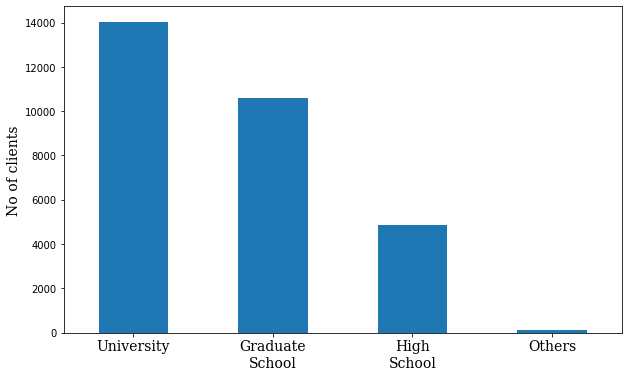

In [16]:
if SHOW_FIGURE :
    # 1=graduate school, 2=university, 3=high school 4=others
    data['EDUCATION'].value_counts().plot(kind='bar', figsize=(10,6))
    # plt.title("Number of cars by make")
    plt.xticks([0,1,2,3],['University','Graduate\nSchool', 'High\nSchool', 'Others'],fontproperties=font,rotation=0)
    # plt.xlabel('Education level', fontproperties=font)
    plt.ylabel('No of clients', fontproperties=font)
    plt.show()
    



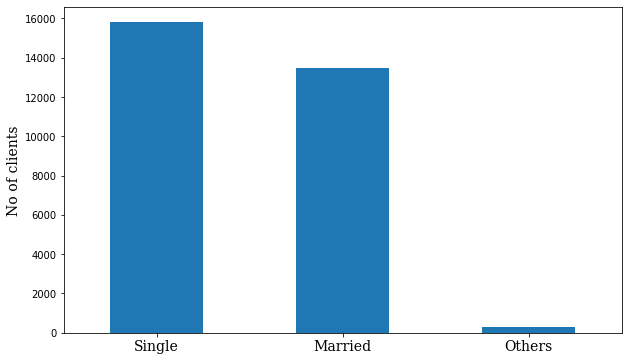

In [17]:
if SHOW_FIGURE :
    # 1=married, 2=single, 3=others
    data['MARRIAGE'].value_counts().plot(kind='bar', figsize=(10,6))
    # plt.title("Number of cars by make")
    plt.xticks([0,1,2],['Single','Married', 'Others'],fontproperties=font,rotation=0)
    # plt.xlabel('Marital Status', fontproperties=font)
    plt.ylabel('No of clients', fontproperties=font)
    plt.show()
  


In [18]:
# Payment delay description
data[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,29601.00,29601.00,29601.00,29601.00,29601.00,29601.00
mean,-0.01,-0.13,-0.16,-0.22,-0.26,-0.29
std,1.12,1.20,1.20,1.17,1.14,1.15
min,-2.00,-2.00,-2.00,-2.00,-2.00,-2.00
25%,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
50%,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00
max,8.00,8.00,8.00,8.00,8.00,8.00


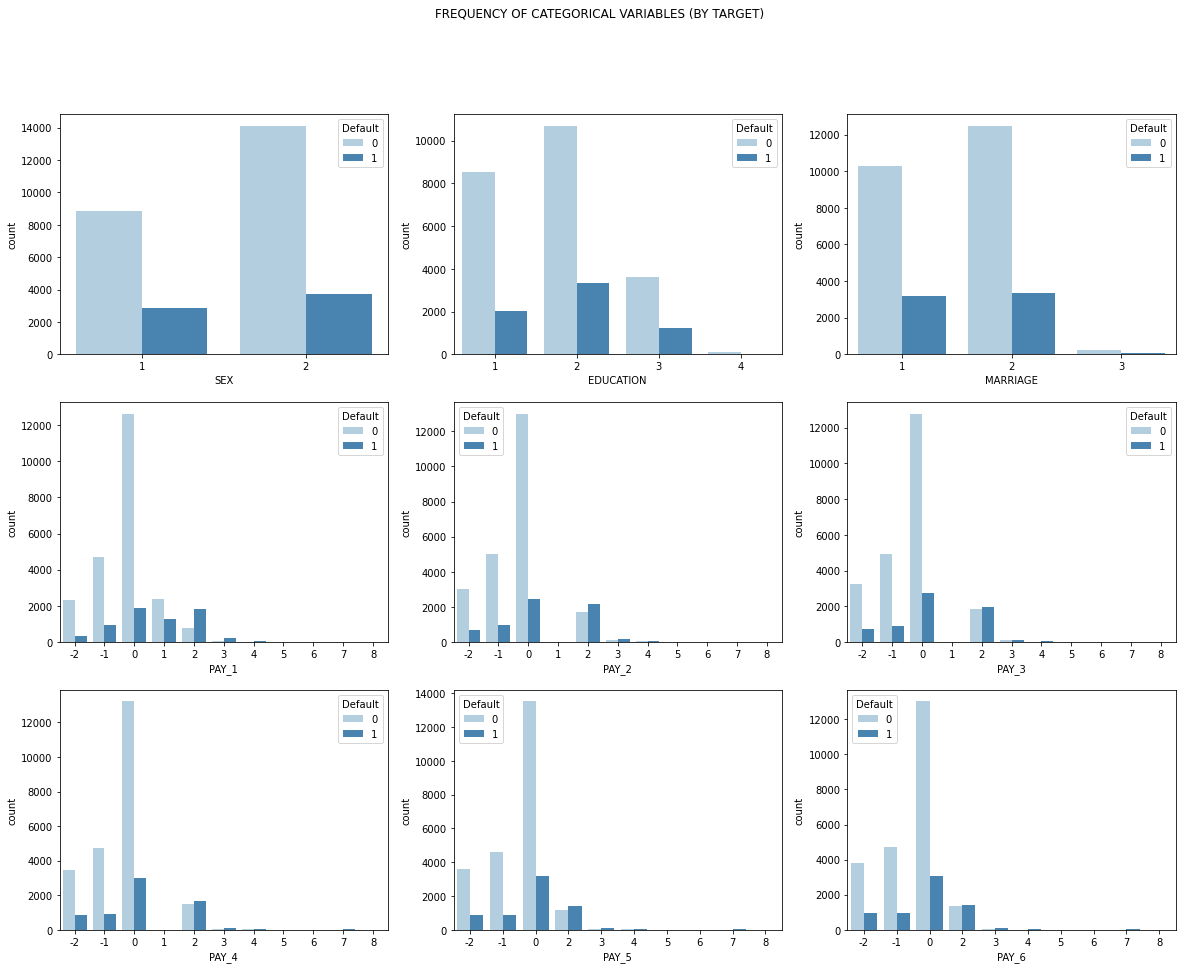

In [19]:
if SHOW_FIGURE :
    # Creating a new dataframe with categorical variables
    subset = data[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'Default']]

    f, axes = plt.subplots(3, 3, figsize=(20, 15), facecolor='white')
    f.suptitle('FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)')
    ax1 = sns.countplot(x="SEX", hue="Default", data=subset, palette="Blues", ax=axes[0,0])
    ax2 = sns.countplot(x="EDUCATION", hue="Default", data=subset, palette="Blues",ax=axes[0,1])
    ax3 = sns.countplot(x="MARRIAGE", hue="Default", data=subset, palette="Blues",ax=axes[0,2])
    ax4 = sns.countplot(x="PAY_1", hue="Default", data=subset, palette="Blues", ax=axes[1,0])
    ax5 = sns.countplot(x="PAY_2", hue="Default", data=subset, palette="Blues", ax=axes[1,1])
    ax6 = sns.countplot(x="PAY_3", hue="Default", data=subset, palette="Blues", ax=axes[1,2])
    ax7 = sns.countplot(x="PAY_4", hue="Default", data=subset, palette="Blues", ax=axes[2,0])
    ax8 = sns.countplot(x="PAY_5", hue="Default", data=subset, palette="Blues", ax=axes[2,1])
    ax9 = sns.countplot(x="PAY_6", hue="Default", data=subset, palette="Blues", ax=axes[2,2]);

In [20]:
# Bill Statement description
data[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,29601.00,29601.00,2.96e+04,29601.00,29601.00,29601.00
mean,50957.43,48942.19,4.68e+04,43122.55,40235.55,38858.45
std,73370.24,70923.99,6.91e+04,64196.38,60699.34,59519.89
min,-165580.00,-69777.00,-1.57e+05,-170000.00,-81334.00,-339603.00
25%,3528.00,2970.00,2.65e+03,2329.00,1780.00,1278.00
50%,22259.00,21050.00,2.00e+04,19005.00,18091.00,17118.00
75%,66623.00,63497.00,5.98e+04,54271.00,50072.00,49121.00
max,964511.00,983931.00,1.66e+06,891586.00,927171.00,961664.00


In [21]:
# Previous Payment Description
data[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()


,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,29601.00,2.96e+04,29601.00,29601.00,29601.00,29601.00
mean,5649.56,5.89e+03,5198.42,4828.66,4795.03,5181.33
std,16568.26,2.31e+04,17580.91,15711.06,15244.22,17657.26
min,0.00,0.00e+00,0.00,0.00,0.00,0.00
25%,1000.00,8.25e+02,390.00,298.00,259.00,138.00
50%,2100.00,2.01e+03,1800.00,1500.00,1500.00,1500.00
75%,5005.00,5.00e+03,4500.00,4014.00,4042.00,4000.00
max,873552.00,1.68e+06,896040.00,621000.00,426529.00,528666.00


In [22]:
data.LIMIT_BAL.describe()


count      29601.00
mean      167550.54
std       129944.02
min        10000.00
25%        50000.00
50%       140000.00
75%       240000.00
max      1000000.00
Name: LIMIT_BAL, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


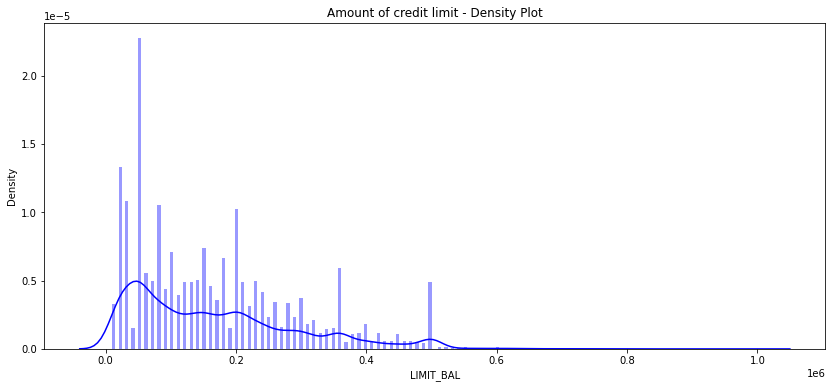

In [23]:
plt.figure(figsize = (14,6))
plt.title('Amount of credit limit - Density Plot')
sns.set_color_codes("pastel")
sns.distplot(data['LIMIT_BAL'],kde=True,bins=200, color="blue")
plt.show()


In [24]:
data['LIMIT_BAL'].value_counts().head(10)


50000.0     3331
20000.0     1955
30000.0     1586
80000.0     1542
200000.0    1498
150000.0    1080
100000.0    1035
180000.0     979
360000.0     872
60000.0      819
Name: LIMIT_BAL, dtype: int64

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


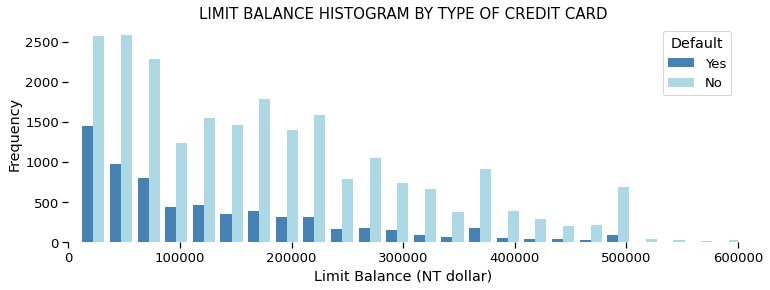

In [25]:
x1 = list(data[data['Default'] == 1]['LIMIT_BAL'])
x2 = list(data[data['Default'] == 0]['LIMIT_BAL'])

plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 40, color=['steelblue', 'lightblue'])
plt.xlim([0,600000])
plt.legend(['Yes', 'No'], title = 'Default', loc='upper right', facecolor='white')
plt.xlabel('Limit Balance (NT dollar)')
plt.ylabel('Frequency')
plt.title('LIMIT BALANCE HISTOGRAM BY TYPE OF CREDIT CARD', SIZE=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


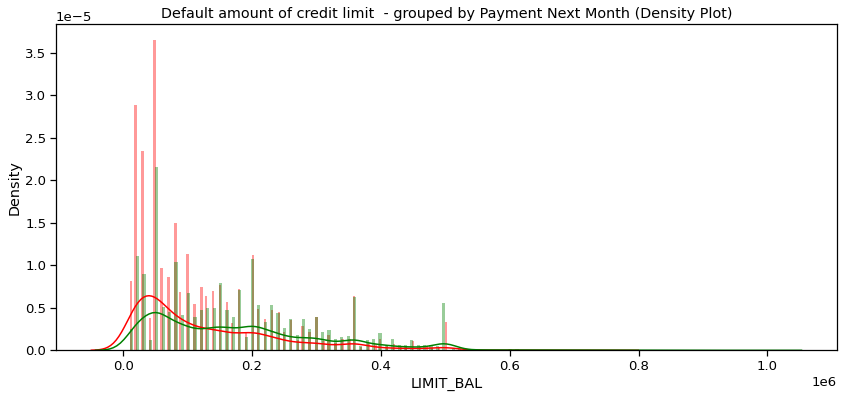

In [26]:
class_1 = data.loc[data['Default'] == 1]["LIMIT_BAL"]
class_0 = data.loc[data['Default'] == 0]["LIMIT_BAL"]
plt.figure(figsize = (14,6))
plt.title('Default amount of credit limit  - grouped by Payment Next Month (Density Plot)')
sns.set_color_codes("pastel")
sns.distplot(class_1,kde=True,bins=200, color="red")
sns.distplot(class_0,kde=True,bins=200, color="green")
plt.show()



The very high value of standard deviation has been further investigated. As can be seen, most of defaults are for credit limits 0-100,000 (and density for this interval is larger for defaults than for non-defaults).

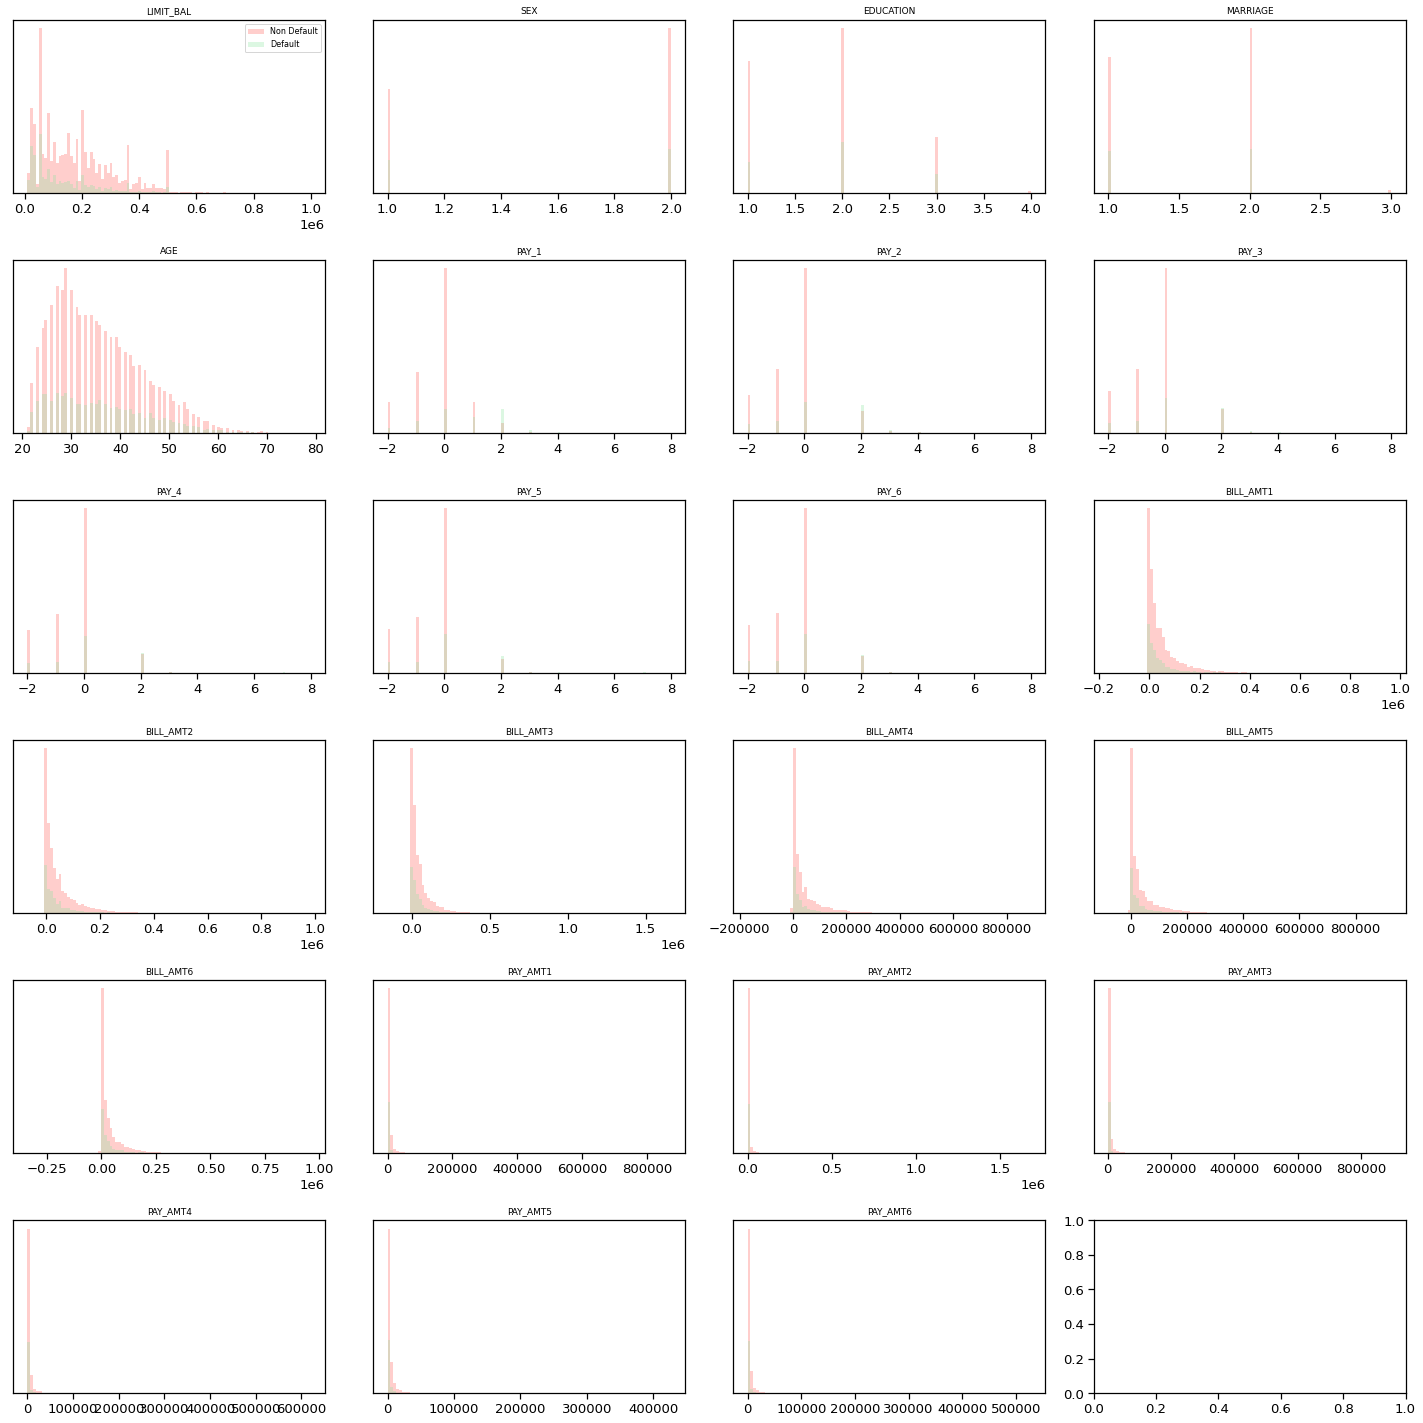

In [27]:
if SHOW_FIGURE :
    # HISTOGRAMS PLOTS FOR FEATURES IMPORTANCE
    fig, axes= plt.subplots(6,4, figsize=(20,20))
    non_def = data[data.Default==0]
    default = data[data.Default==1]
    ax = axes.ravel()

    for i,label in enumerate(data.columns[:-1]):
        _,bins = np.histogram(data[label],bins=100)
        ax[i].hist(non_def[label],bins=bins,color='r',alpha=.5)# red color for malignant class
        ax[i].hist(default[label],bins=bins,color='g',alpha=0.3)# alpha is for transparency in the overlapped region
        ax[i].set_title(data.columns[i],fontsize=9)
        ax[i].axes.get_xaxis().set_visible(True) # the x-axis co-ordinates are not so useful, as we just want to look how well separated the histograms are
        ax[i].set_yticks(())


    ax[0].legend(['Non Default','Default'],loc='best',fontsize=8)
    plt.tight_layout() # let's make good plots
    plt.show()


*Correlation between features*

Another relevant point which could affect the classification performances is the correlation among features: the presence of strongly correlated features may lead to a decline in the performances of some classification algorithms which assume that the predictors are all independent. Another benefit from spotting correlation among features is that the same information may be encoded with less attributes, and this could lead to simpler final models. Indeed, some methods suffer from high dimensional datasets (especially distance based ones with a few number of samples), so reducing the dimensions of the feature vectors can make it more trustable and stable, if the discarded dimensions don’t affect significantly the total original information.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


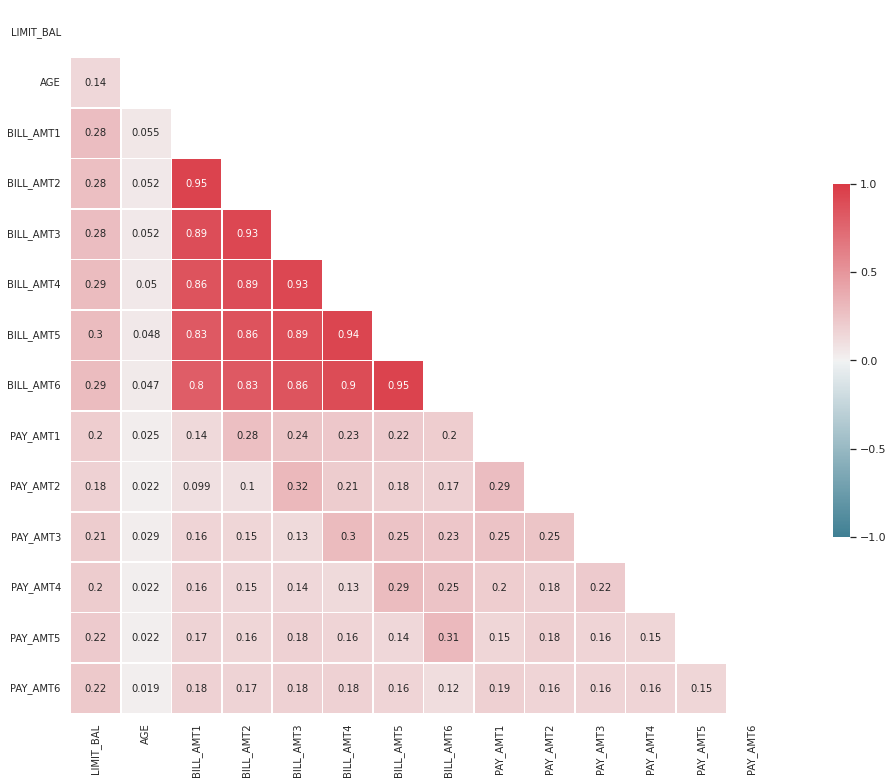

In [28]:
# Correlation matrix
sns.set(style="white", font_scale=1)
numeric = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
corr = data[numeric].corr() # .corr is used to find corelation

mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 13))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax=sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cmap=cmap, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 10})
cbar=ax.collections[0].colorbar
cbar.set_ticks([-1, -0.50, 0, 0.50, 1])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

The following representation shows the correlation matrix between features: since the way the matrix is constructed make it symmetric and because of the large number of features, only the heatmap of the lower diagonal matrix (the diagonal itself is excluded) is reported for a better visualization. 

As shown in the correlation matrix above, some features show high correlations with each other. In particular, there exist an high positive correlation among the BILL_AMTn features, for example:

 BILL_AMT1 and BILL_AMT2 have p=0.95
 BILL_AMT2 and BILL_AMT3 have p=0.93
 BILL_AMT4 and BILL_AMT5 have p=0.94

 To give a further proof of the linear dipendence of these variables, their interactions plots are shown below:

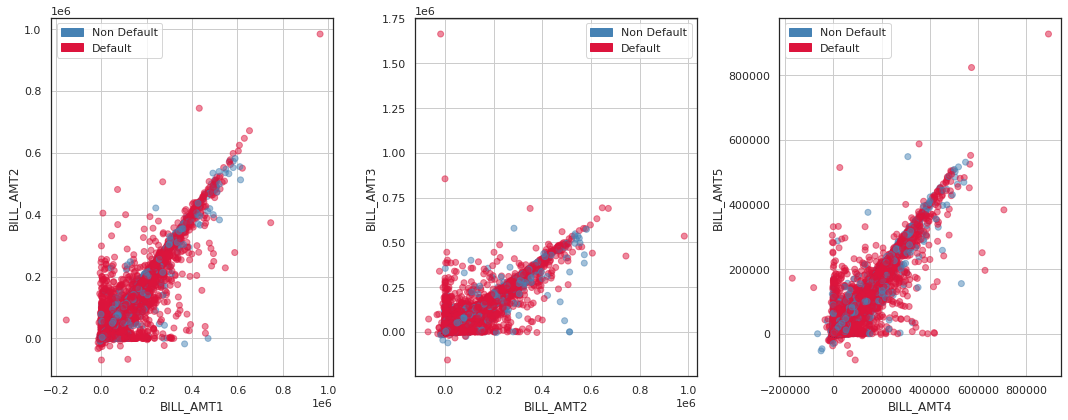

In [29]:
#distribution correlated features -- scatter interaction
import matplotlib.patches as mpatches


data_np=data.to_numpy()
target=data.Default

# variables to 
BILL_AMT1 = data['BILL_AMT1'].to_numpy()
BILL_AMT2 = data['BILL_AMT2'].to_numpy()
BILL_AMT3 = data['BILL_AMT3'].to_numpy()
BILL_AMT4 = data['BILL_AMT4'].to_numpy()
BILL_AMT5 = data['BILL_AMT5'].to_numpy()
BILL_AMT6 = data['BILL_AMT6'].to_numpy()
AGE = data['AGE'].to_numpy()
LIMIT_BAL = data['LIMIT_BAL'].to_numpy()
PAY_AMT1 = data['PAY_AMT1'].to_numpy()

fig, ax = plt.subplots(1,3, figsize= (15,6))

labels=["Non Default","Default"]
pop_a = mpatches.Patch(color='steelblue', label='Non Default')
pop_b = mpatches.Patch(color='crimson', label='Default')
colors=['crimson', 'steelblue']

ax[0].scatter(BILL_AMT1, BILL_AMT2, c=target, cmap=matplotlib.colors.ListedColormap(colors), label=labels, alpha=0.5)
ax[0].grid()
ax[0].set_xlabel('BILL_AMT1')
ax[0].set_ylabel('BILL_AMT2')
ax[0].legend(handles= [pop_a,pop_b])

ax[1].scatter(BILL_AMT2, BILL_AMT3, c=target, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)
ax[1].grid()
ax[1].set_xlabel('BILL_AMT2')
ax[1].set_ylabel('BILL_AMT3')
ax[1].legend(handles= [pop_a,pop_b])

ax[2].scatter(BILL_AMT4,BILL_AMT5, c=target, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)
ax[2].grid()
ax[2].set_xlabel('BILL_AMT4')
ax[2].set_ylabel('BILL_AMT5')
ax[2].legend(handles= [pop_a,pop_b])

plt.tight_layout()# let's make good plots
plt.show()



The charts confirm what expected, the features in the same graph shows a linear trend as the Pearson coefficient suggested, indicating they encode pretty similar information.

For completness, also charts of non-strongly correlated features are reported. In particular:

AGE and LIMIT_BAL p=0.14
AGE and BILL_AMT1 p=0.055
PAY_AMT1 and BILL_AMT1 p=0.099

For more cleareance lok at the chart below  

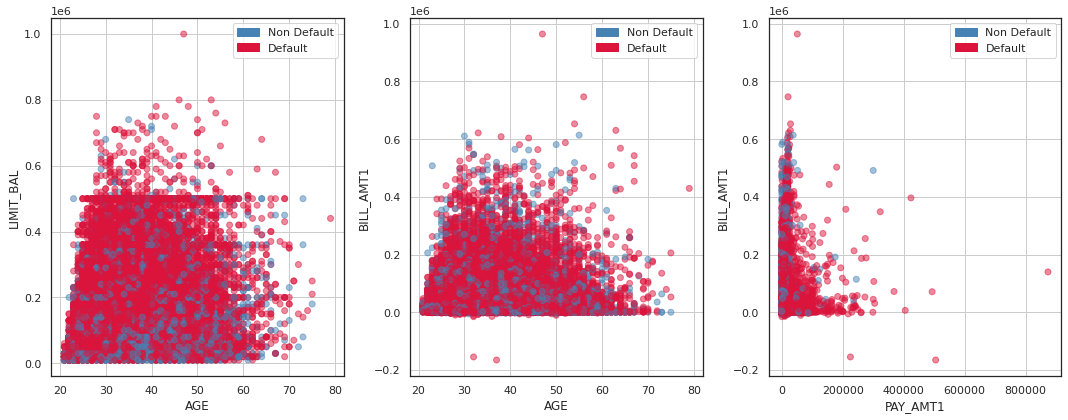

In [30]:
#distribution un-correlated features -- scatter interaction

fig, ax = plt.subplots(1,3, figsize= (15,6))

labels=["Non Default","Default"]
pop_a = mpatches.Patch(color='steelblue', label='Non Default')
pop_b = mpatches.Patch(color='crimson', label='Default')
colors=['crimson', 'steelblue']

ax[0].scatter(AGE, LIMIT_BAL, c=target, cmap=matplotlib.colors.ListedColormap(colors), label=labels, alpha=0.5)
ax[0].grid()
ax[0].set_xlabel('AGE')
ax[0].set_ylabel('LIMIT_BAL')
ax[0].legend(handles= [pop_a,pop_b])

ax[1].scatter(AGE, BILL_AMT1, c=target, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)
ax[1].grid()
ax[1].set_xlabel('AGE')
ax[1].set_ylabel('BILL_AMT1')
ax[1].legend(handles= [pop_a,pop_b])

ax[2].scatter(PAY_AMT1,BILL_AMT1, c=target, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)
ax[2].grid()
ax[2].set_xlabel('PAY_AMT1')
ax[2].set_ylabel('BILL_AMT1')
ax[2].legend(handles= [pop_a,pop_b])

plt.tight_layout()# let's make good plots
plt.show()

**Boxplot**

Finally, the boxplots for each of the numerical features are plotted in order to have a further look at the distribution and to eventually spot outliers (i.e. “bad” data that either has been misscomputed or is strongly exceptional wrt expected range).

A boxplot represents a 5-number summary of data:

    1st quartile: the twenty-fifth percentile;
    median (or 2nd quartile): the middle value of a dataset;
    3rd quartile: the seventy-fifth percentile;
    minimum: the lowest data point excluding any outliers;
    maximum: the largest data point excluding any outliers.


Text(0.5, 1.0, 'Boxplot')

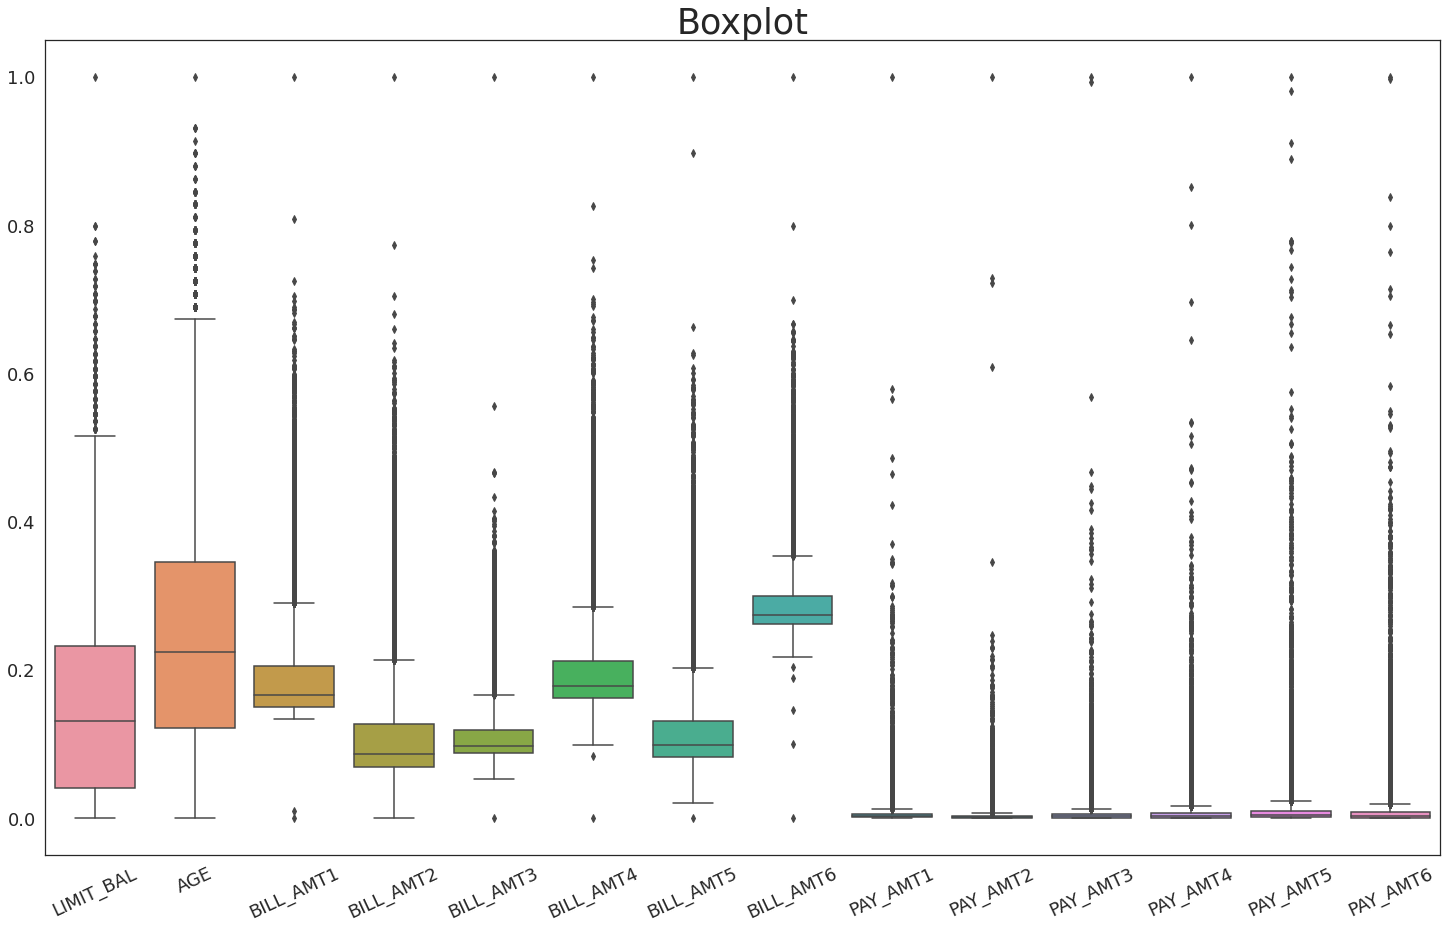

In [31]:
scaler = MinMaxScaler()
data['LIMIT_BAL'] = scaler.fit_transform(data['LIMIT_BAL'].values.reshape(-1, 1))
data['AGE'] = scaler.fit_transform(data['AGE'].values.reshape(-1, 1))

for i in range(1,7):
    scaler = MinMaxScaler()
    data['PAY_' + str(i)] = scaler.fit_transform(data['PAY_' + str(i)].values.reshape(-1, 1))

for i in range(1,7):
    scaler = MinMaxScaler()
    data['BILL_AMT' + str(i)] = scaler.fit_transform(data['BILL_AMT' + str(i)].values.reshape(-1, 1))

for i in range(1,7):
    scaler = MinMaxScaler()
    data['PAY_AMT' + str(i)] = scaler.fit_transform(data['PAY_AMT' + str(i)].values.reshape(-1, 1))
    
# BOXPLOT
cols = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

fig=plt.figure(1, figsize=(25,15))
ax=fig.add_subplot(111)
sns.boxplot(data=data[cols])
plt.xticks(np.arange(0,14), labels=cols, rotation=25, fontsize=18)
plt.yticks(fontsize=18)
plt.title('Boxplot', fontsize= 35)


**Standardization**

Another possible scaling technique is referred to as standardization.

(array([-5.,  0.,  5., 10., 15., 20., 25.]),
 <a list of 7 Text major ticklabel objects>)

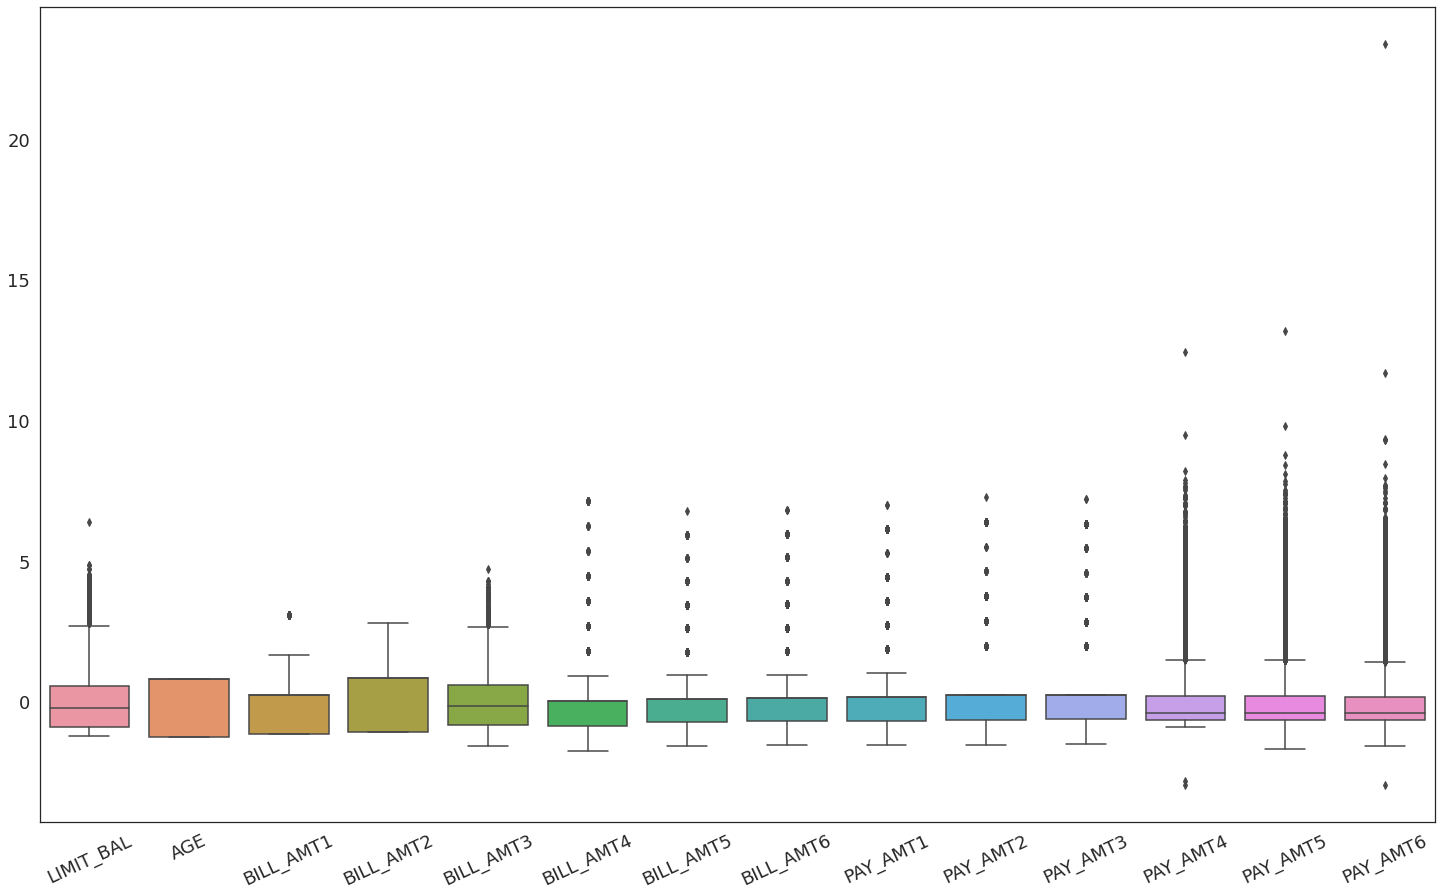

In [32]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# BOXPLOT
cols = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

fig=plt.figure(1, figsize=(25,15))
ax=fig.add_subplot(111)
sns.boxplot(data=scaled_data[:,:-10])
plt.xticks(np.arange(0,14), labels=cols, rotation=25, fontsize=18)
plt.yticks(fontsize=18)





**Data Preprocessing**

 One-hot encoding for categorical variables

An integer encoding may impose some ordinal relationship between categorical variables that does not exist, for this reason a one-hot encoding is performed. Categorical variable such as SEX, MARRIAGE and EDUCATION are turned into one-hot variables in order to remove any orders that in this case have no meaning.

A one hot encoding is a representation of categorical variables as binary vectors. This first requires that the categorical values be mapped to integer values. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

In [33]:
# Set 'category' type to categorical attributes
for att in ['SEX', 'EDUCATION', 'MARRIAGE']:
  data[att] = data[att].astype('category')

# one-hot encoding
data=pd.concat([pd.get_dummies(data['SEX'], prefix='SEX'),
                pd.get_dummies(data['EDUCATION'], prefix='EDUCATION'), 
                pd.get_dummies(data['MARRIAGE'], prefix='MARRIAGE'),
                data],axis=1)
# drop original columns
data.drop(['EDUCATION'],axis=1, inplace=True)
data.drop(['SEX'],axis=1, inplace=True)
data.drop(['MARRIAGE'],axis=1, inplace=True)
# print samples
data.head()

,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,LIMIT_BAL,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,0,1,0,1,0,0,1,0,0,0.01,...,0.16,0.08,0.26,0.00e+00,4.09e-04,0.00e+00,0.00e+00,0.00e+00,0.00e+00,1
1,0,1,0,1,0,0,0,1,0,0.11,...,0.16,0.08,0.26,0.00e+00,5.94e-04,1.12e-03,1.61e-03,0.00e+00,3.78e-03,1
2,0,1,0,1,0,0,0,1,0,0.08,...,0.17,0.10,0.27,1.74e-03,8.91e-04,1.12e-03,1.61e-03,2.34e-03,9.46e-03,0
3,0,1,0,1,0,0,1,0,0,0.04,...,0.19,0.11,0.28,2.29e-03,1.20e-03,1.34e-03,1.77e-03,2.51e-03,1.89e-03,0
4,1,0,0,1,0,0,1,0,0,0.04,...,0.18,0.10,0.28,2.29e-03,2.18e-02,1.12e-02,1.45e-02,1.62e-03,1.28e-03,0


Train-test split

The dataset is divided in training set and test set, with the proportion 3:1. Given the imbalance fashion in the original dataset a stratified sampling strategy has been applied during the split, so that the proportion of defaulters/non-defaulters clients in each of the final sets would approximately be the same as the initial one. This approach is desirable every time we have a highly unbalanced dataset as in our case.
The final split obtained is distributed as follows:
Non-defaulter 	Defaulters 	Total
Training set 	17246 	4954 	22200
Test set 	     5750 	1651 	7401

Note that the split has been randomly generated but kept the same for all the following methods, in order to to make evaluations statistically meaningful and provide consistent results among the different classifiers.

random_state = 42



In [34]:
# Separating features and target
y = data.Default     # target default=1 or non-default=0
X = data.drop('Default', axis = 1, inplace = False)


In [35]:
# Check data set dimension
print(X.shape)
print("Number of samples:", X.shape[0])
print("Number of attributes:", X.shape[1])


(29601, 29)
Number of samples: 29601
Number of attributes: 29


In [36]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE, stratify=y)

In [37]:
# Check dimensions
print(np.shape(X_train_val))
print(np.shape(X_test))

print("Training set:")
print(f" + Non-defaulters (y=0): {len(y_train_val[y_train_val==0])}")
print(f" + Defaulters (y=1):\t {len(y_train_val[y_train_val==1])}")

print("Test set:")
print(f" + Non-defaulters (y=0): {len(y_test[y_test==0])}")
print(f" + Defaulters (y=1):\t {len(y_test[y_test==1])}")

(22200, 29)
(7401, 29)
Training set:
 + Non-defaulters (y=0): 17246
 + Defaulters (y=1):	 4954
Test set:
 + Non-defaulters (y=0): 5750
 + Defaulters (y=1):	 1651


Feature Selection

On top of feature transformation, the data preprocessing phase often includes a feature selection step, where the attributes from the given dataset are carefully analysed and finally selected to feed the machine learning algorithm.
As previously seen in the correlation matrix and with scatter plots, some features in this dataset are strongly linearly correlated, so it is not meaningful to keep all of them because they may contain redundant information. In this way, features with a Pearson coefficient p>=0.92.
with other predictors should be discarded.

In particular, at this step the following features are removed: BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6.

In [38]:
if FEATURE_SELECTION :
    # remove features with correlation coefficent >= 0.93
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
    to_drop = [column for column in upper.columns if any(upper[column] >= 0.92)]
    print(to_drop) #['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
    data= data.drop(data[to_drop], axis = 1)


**Principal Component Analysis (PCA)**

Another way to obtain a lower dimensional dataset when dealing with multicollinearity among features, is by applying a Principal Component Analysis (PCA) to our data.

PCA is an unsupervised learning technique that performs a linear transformation (by means of an orthogonal matrix) of the original space such that the new basis found has dimensions (features) that are sorted from largest to smallest possible variance.

The intuition behind this approach lies in the fact that if the direction of maximum variance in the original space is not directly captured by the features in the dataset, then that direction might be used to construct a new feature that has a larger variance, hence probably encoding more informatio

Actual number of components: 29


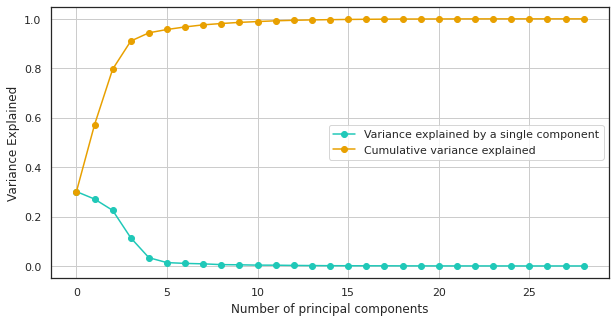

In [39]:
from sklearn.decomposition import PCA

print(f"Actual number of components: {len(X_train_val.columns.values)}")

n_pc = len(X_train_val.columns.values) # with n_components = 11 -> 0.98693009 variance explained

pca = PCA(n_components=n_pc)
pca.fit(X_train_val)

# print(np.cumsum(pca.explained_variance_ratio_))
# print(pca.explained_variance_ratio_)

fig=plt.figure(1, figsize=(10,5))
plt.grid(b=True, which='major', axis='both')
plt.plot(pca.explained_variance_ratio_, marker='o', color='#20c8b8')
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', color='#e8a000')
# plt.xticks([n for n in range(0,n_pc)], [ "PC"+str(n) for n in range(1,n_pc+1)])
plt.legend(["Variance explained by a single component", "Cumulative variance explained"])
plt.xlabel('Number of principal components')
plt.ylabel('Variance Explained')
plt.savefig("PCA");


In this study, PCA has been performed on the Credit card dataset to deal with the multicollinearity problem and reduce the number of dimensions. The following figure shows how the variance has been redistributed on the new features extracted.


The graph above is relative to the proportion of explained variance: the green line represents the proportion of variance explained by each principal component. While the orange line instead is the cumulative amount of proportion of variance explained (i.e. the sum of the single variance explained by the principal components on the left).

This graph is useful to take decision regarding the number of components to keep. The following table report some interesting values for the number of components.
Number of PCs 	Cumulative Variance Explained
4 	89.7 %
6 	95.3 %
8 	97.1 %
12 	99.0 %

For example, the first 12 PCs are able to capture almost the whole variance (99%) of the data points and for this reason we decided to keep these number.

Note that PCA is applied based only on the training data in order to avoid any leaking the information of test data.



In [40]:
n_pc = 12
pca = PCA(n_components=n_pc)
pca.fit(X_train_val)
#   X_train_val.index = pd.RangeIndex(start=0, stop=len(X_train_val), step=1)
X_12d_train_val = pd.DataFrame(pca.transform(X_train_val))
X_12d_test = pd.DataFrame(pca.transform(X_test))
X_12d_train_val.columns = ['PC' + str(i) for i in range(1, n_pc+1) ]
X_12d_test.columns = ['PC' + str(i) for i in range(1, n_pc+1) ]
X_12d_train_val.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,1.15,0.53,0.41,-0.20,7.13e-02,-0.05,-0.03,9.30e-03,7.70e-03,-0.08,-2.03e-02,8.73e-02
1,0.17,-0.67,-0.81,-0.04,1.24e-03,0.37,-0.10,3.96e-02,1.96e-02,-0.07,-8.33e-03,-3.59e-03
2,-0.87,-0.28,0.54,0.86,-1.52e-01,-0.03,-0.26,1.31e-01,1.62e-01,-0.11,-1.70e-02,-4.85e-02
3,-0.52,-0.38,0.95,-0.33,6.32e-01,-0.09,0.09,-7.05e-02,3.50e-02,-0.08,1.04e-02,-3.72e-02
4,-1.07,-0.25,-0.29,-0.24,1.91e-01,0.40,-0.03,-1.44e-02,7.59e-02,-0.16,-2.23e-02,1.42e-01


**Oversampling and undersampling**

When dealing with significantly unbalanced dataset in the target label, it becomes harder for most machine learning algorithms to efficiently learn all classes. The training process might be indeed biased towards a certain class if the dataset distribution is poorly balanced.

In the specific case of the credit card clients, only about 22.1% of the data are labelled as defaulters (y=1).
	Number of rows 	Percentage
  Non-defaulters (class=0) 	17246 	77.68 %
  Defaulters (class=1) 	4954 	22.32 %

While the obvious and most desirable solution would be to collect more real data, oversampling and undersampling are techniques that may still come in handy in these situations.
For both techniques there is a naïve approach that is the random oversampling (undersampling) where training data is incremented (decremented) with multiple copies of the samples, until the same proportion is obtained on the minority (majority) classes.


**Oversampling: Synthetic Minority Over-sampling Technique (SMOTE)**

With SMOTE algorithm the minority class is augmented artificially, by constructing new synthetic samples randomly positioned in between one point and its k-neighbors. In other words, given a limited set of data points that belong to the class that we wish to augment, we trace high-dimensional lines connecting the data points and we draw new samples from such lines. 

**Undersampling: Cluster Centroids**

Cluster Centroids make use of K-means algorithm to perform undersampling. After finding the cluster centroids on the majority class points, the algorithm selects the instances belonging to the cluster (labelled with the majority class), which are furthest from the cluster centroid in feature space. These data points are considered as the most unimportant instance. On the contrary, the instance belonging to the majority class, that is nearest to the cluster centroid in feature space, is considered to be the most important instance. In this way, instances belonging to the majority class are removed on the basis of their importance.


**Classification algorithms**

In this section a description of the algorithms used is presented. For each of them, different hyperparameters are tuned in order to find the ones performing best, and, once found, the model trained with them is used to predict class labels on test data combining different data preprocessing techniques presented above in order to spot some performances differences. The best configuration is selected by comparing the different metrics, principally based on the f1-score because accuracy on unbalance dataset may return an high values even if the minority class is not correcly classified.

Each algorithm is trained on dataset with different preprocessing techniques combined:

    Principal Component Analysis (PCA)
    PCA + SMOTE (oversampling)
    PCA + Cluster Centroids (undersampling)

The algorithms considered are:

    Logistic Regression
    Random forest (and Decision Trees)
    SVM (both Linear and RBF)


In [41]:
import imblearn 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids
from imblearn.pipeline import make_pipeline

import sklearn.ensemble
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import f1_score, make_scorer, precision_score, recall_score, accuracy_score, plot_confusion_matrix
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


# PARAMETER CLASSIFICATION
ALGORITHM = 'LogisticRegression' # 'RandomForest', 'LogisticRegression', 'LDA', 'KNN'
APPLY_OVERSAMPLING = False
APPLY_UNDERSAMPLING = True

if APPLY_OVERSAMPLING:
    APPLY_UNDERSAMPLING = False
    
if APPLY_UNDERSAMPLING:
    APPLY_OVERSAMPLING = False


In [42]:
# TRAIN AND VALIDATION
# Stratified K-Fold Cross Validation

# Pipeline
if ALGORITHM == 'SVM' : 
    # Support Vector Machine (SVM) classifier
    # best config found {'C': 1, 'gamma': 0.01, 'kernel': 'poly'} # 0.7963817277250114
    parameter_grid = {
      'C': [100, 0.1, 1, 10],
      'kernel': ['rbf', 'poly'],
      'gamma': [0.0001, 0.001, 0.01]
    }
    clf_name = 'svc__'
    classifier = SVC() # or SVC
    
elif ALGORITHM == 'RandomForest':
    # Random Forest classifier
    # {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__n_estimators': 100, 'randomforestclassifier__oob_score': True}
    parameter_grid = {
      "criterion":["gini", "entropy"],
      "max_features":[None, "sqrt"],
      "oob_score":[True],
      "n_estimators":[10, 50, 100, 200]
    }
    clf_name = 'randomforestclassifier__'
    classifier = RandomForestClassifier()
    
elif ALGORITHM == 'LogisticRegression':
    # Logistic Regression classifier
    parameter_grid = {
        "C":[0.0001, 0.001, 0.01, 0.1, 1, 10]
    }
    clf_name = 'logisticregression__'
    classifier = LogisticRegression()
    
elif ALGORITHM == 'KNN':
    # K-Nearest Neighbors classifier
    parameter_grid = {
        "n_neighbors":[500, 800, 1500, 2500, 3500, 4500]
    }
    clf_name = 'kneighborsclassifier__'
    classifier = KNeighborsClassifier() 
else :
    raise RuntimeError("Choose a correct classifier.");
    

new_params = {clf_name + key: parameter_grid[key] for key in parameter_grid}

kf = StratifiedKFold(n_splits=5)

if APPLY_OVERSAMPLING:
    # apply oversampling on training dataset
    imba_pipeline = make_pipeline(SMOTE(random_state=RANDOM_STATE), classifier)
elif APPLY_UNDERSAMPLING:
    # TO DO
    imba_pipeline = make_pipeline(ClusterCentroids(random_state=RANDOM_STATE), classifier)
else :
    # DO NOT apply oversampling on training dataset, just the classifier
    imba_pipeline = make_pipeline(classifier)

SCORE = 'precision' # 'accuracy', 'precision', 'recall', 'f1'
grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, scoring=SCORE, return_train_score=True)

grid_imba.fit(X_train_val, y_train_val)

print(f"Best configuration found for {classifier}:")
print(grid_imba.best_params_)
print(f"Val {SCORE}:   {grid_imba.best_score_}")


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Best configuration found for LogisticRegression():
{'logisticregression__C': 0.01}
Val precision:   0.32120192979610984


**Classification algorithms**

In this section a description of the algorithms used is presented. For each of them, different hyperparameters are tuned in order to find the ones performing best, and, once found, the model trained with them is used to predict class labels on test data combining different data preprocessing techniques presented above in order to spot some performances differences. The best configuration is selected by comparing the different metrics, principally based on the f1-score because accuracy on unbalance dataset may return an high values even if the minority class is not correcly classified.

Each algorithm is trained on dataset with different preprocessing techniques combined:

    Principal Component Analysis (PCA)
    PCA + SMOTE (oversampling)
    PCA + Cluster Centroids (undersampling)

The algorithms considered are:

    Logistic Regression
    Random forest (and Decision Trees)
    SVM (both Linear and RBF)


0.6930144575057424 0.4805669867398262 0.38597135512302605 0.6365838885523925



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'normalized confusion matrix logisticregression__')

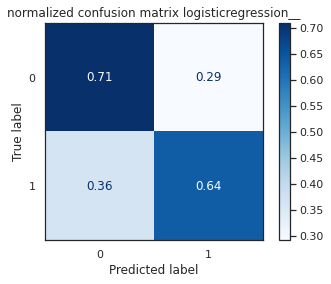

In [43]:
 #TEST
# evaluation on test data with bestparams

# Oversampling
smote = SMOTE()
X_train_val, y_train_val = smote.fit_resample(X_train_val, y_train_val)

# retrain with best params
clf = classifier
clf.fit(X_train_val, y_train_val)
y_pred = clf.predict(X_test)

accuracy=accuracy_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)

print(accuracy, f1, precision, recall)
print(f"")

# print(classification_report())

disp = plot_confusion_matrix(clf, X_test, y_test,
                                 #display_labels=class_names,
                                 cmap=plt.cm.Blues, 
                                 #display_labels=data.target_names, 
                                 normalize='true')

disp.ax_.set_title(f'normalized confusion matrix {clf_name}')